In [1]:
import matplotlib
import catppuccin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use(["dark_background", catppuccin.PALETTE.mocha.identifier])
%matplotlib inline

In [2]:
def function(x):
    return (x + 3) ** 2

In [3]:
def gradient(x, h=1e-7):
    return (function(x + h) - function(x - h)) / (2 * h)

In [4]:
def gradient_descent(
    gradient_function, start, learning_rate=0.1, n_iterations=50, tolerance=1e-04
):
    print(start)
    x = start
    history = []

    for _ in range(n_iterations + 1):
        history.append(x)
        gradient = gradient_function(x)

        x_new = x - learning_rate * gradient

        if abs(x_new - x) < tolerance:
            print("Convergence")
            break

        x = x_new

    return x, history

In [5]:
def plot_history(history):
    index = np.array([i for i in range(len(history))])
    x = np.round(np.array(history), 7)
    y = np.round(function(x), 7)
    grad = np.round(gradient(x), 10)

    table = pd.DataFrame({"Iteration": index, "X": x, "Y": y, "Gradient": grad})
    return table

In [6]:
def plot_graph(history):
    X = np.linspace(-5, 5, 500)
    Y = function(X)

    x_grad = np.array(history)
    y_grad = function(x_grad)

    plt.figure(figsize=(15, 15))

    plt.plot(X, Y, "-", linewidth=0.75, label="(x+3)^2")
    plt.plot(
        x_grad,
        y_grad,
        "o-",
        markersize=3,
        linewidth=1,
        alpha=0.6,
        label="Gradient Path",
    )
    plt.plot(0)
    plt.plot(x_grad[0], y_grad[0], "o", markersize=5, label="Start")
    plt.plot(x_grad[-1], y_grad[-1], "*", markersize=10, label="Minima")
    plt.legend()
    plt.title("Gradient Descent")
    plt.xlabel("X")
    plt.ylabel("Y")

In [7]:
x_start = 2

In [8]:
minima, history = gradient_descent(
    gradient_function=gradient, start=x_start, learning_rate=0.1, tolerance=1e-05
)

2


In [9]:
plot_history(history=history)

,Iteration,X,Y,Gradient
0,0,2.000000,2.500000e+01,10.000000
1,1,1.000000,1.600000e+01,8.000000
2,2,0.200000,1.024000e+01,6.400000
3,3,-0.440000,6.553600e+00,5.120000
4,4,-0.952000,4.194304e+00,4.096000
5,5,-1.361600,2.684355e+00,3.276800
6,6,-1.689280,1.717987e+00,2.621440
7,7,-1.951424,1.099512e+00,2.097152
8,8,-2.161139,7.036874e-01,1.677722
9,9,-2.328911,4.503599e-01,1.342177


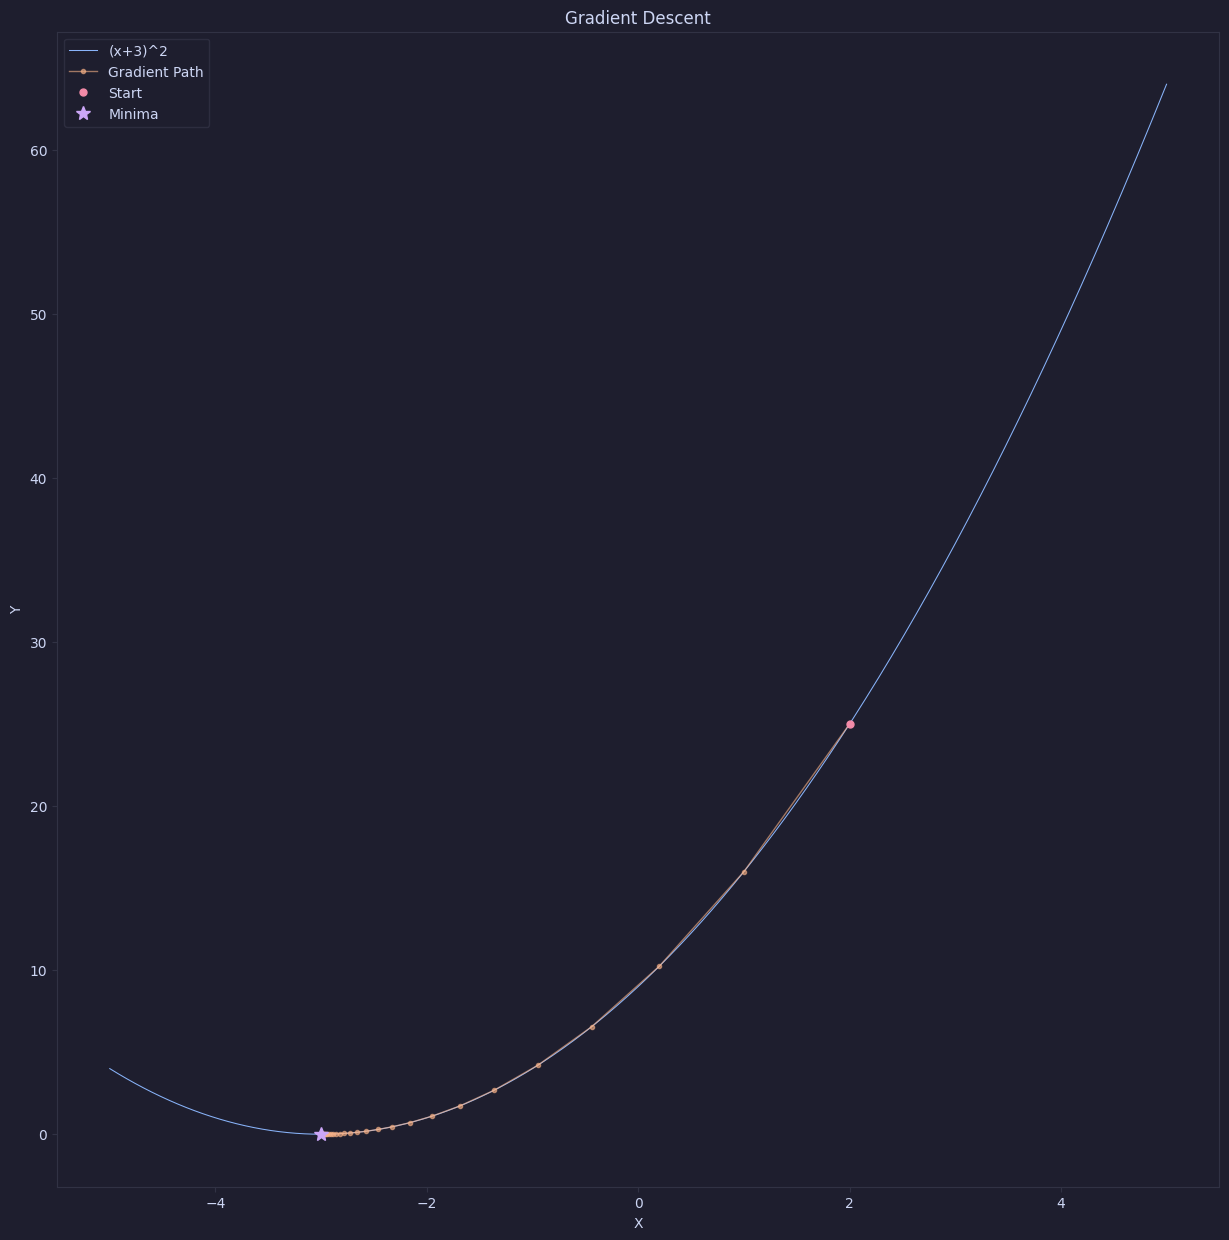

In [10]:
plot_graph(history=history)